# Visualizing data with Matplotlib
(c) 2017 Wouter van Atteveldt, CC-BY-SA

# Outline
1. *Matplotlib basics*
2. Plotting from pandas
3. Plot types
4. Bonus: Interactive online plots
5. Visualizing reviews 

# Matplotlib 
+ Low-level plotting library
+ Can produce publication quality figures
+ Highly customizable
+ Syntax can be verbose

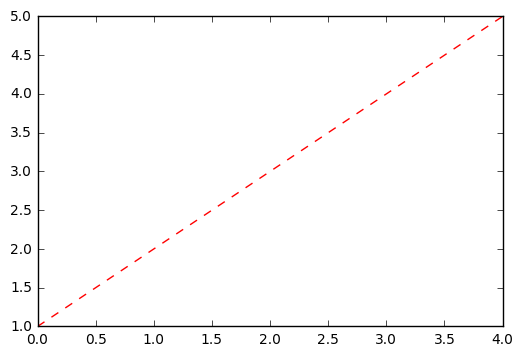

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5], 'r--');

# Figures and subplots

+ Figures are comprised of subfigures
+ Subfigures contain actual plots
+ Figures, subfigures created implicitly
+ Can create subplots manually
    + Easier customization

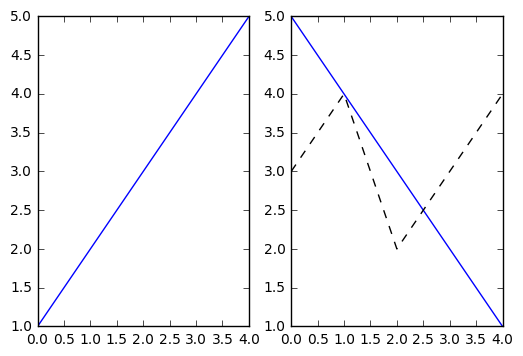

In [2]:
fig = plt.figure()
sub1 = fig.add_subplot(1,2,1)
sub1.plot([1,2,3,4,5])
sub2 = fig.add_subplot(1, 2, 2)
sub2.plot([5,4,3,2,1]);
sub2.plot([3,4,2,3,4], 'k--');

# plt.Subplots function

Shortcut for creating figure and subplots

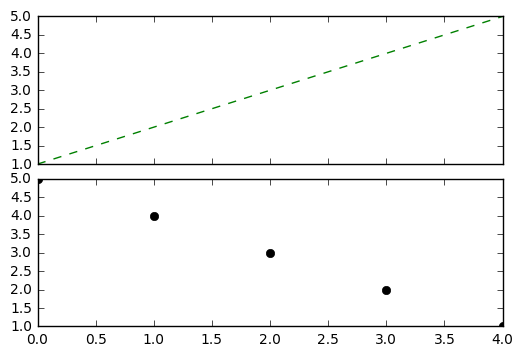

In [3]:
fig, subplots = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0.1)
subplots[0].plot([1,2,3,4,5], 'g--')
subplots[1].plot([5,4,3,2,1], 'ko')

# Setting plot properties

+ Line properties: use style or linestyle=, color=, marking=
+ Plot properties: 
    + xlim, ylim = axis ranges
    + title, xlabel, ylabel = plot title
+ Two ways to set plot properties:
    + Procedural: get value with `plt.xlim()`, set with `plt.xlim([0,10])`
    + Object-oriented: `subfig.get_xlim()` / `subfig.set_xlim(0,10)`
    + Shortcut: `subfig.set(xlim=.., title=..)`

(3, 6)

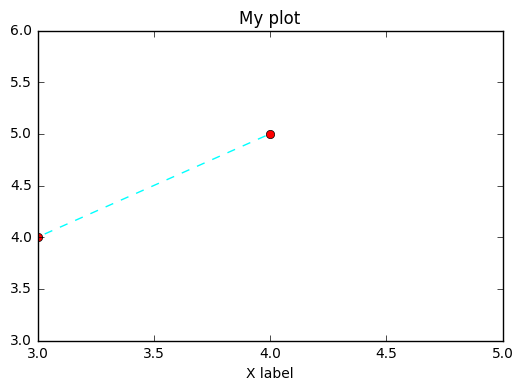

In [4]:
f = plt.subplot()
f.plot([1,2,3,4,5], linestyle="--", color="#00FFFF", marker="o", markerfacecolor="red")
f.set(title="My plot", xlim=[3,5])
f.set_xlabel("X label")
plt.ylim([3,6])

# Annotations
+ Add text to graph at point
    + annotate(text, xy=(x,y))
    + annotate(text, xy=(x,y), xytext=(x,y), arrowprops=dict(facecolor='green'))
    + Can use latex mathematics
+ Shade part of plot
    + fill_between(x, y1, y2, color=, alpha=)
+ Add vertical / horizontal lines
    + plot((x1, x2), (y1, y2), 'k-')

# Extended example

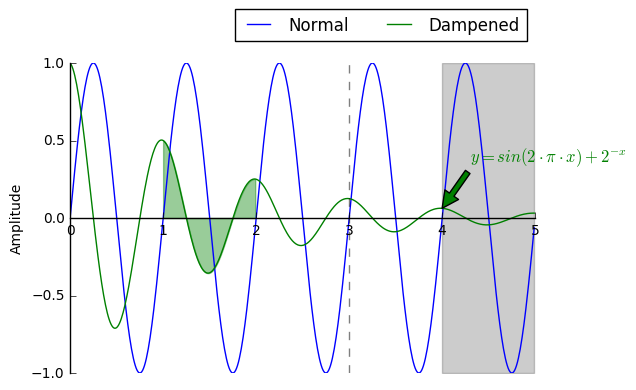

In [5]:
f = plt.subplot()
t = np.arange(0, 5, 0.01)
y1 = np.sin(2*np.pi*t)
y2 = np.cos(2*np.pi*t) * 2**-t

f.plot(t, y1, label="Normal")
f.plot(t, y2, label="Dampened")

f.spines['bottom'].set_position('center')
f.spines['top'].set_visible(False)
f.spines['right'].set_visible(False)

plt.tick_params(top='off', right='off')

f.set(ylabel="Amplitude")
f.legend(loc='upper right', bbox_to_anchor=(1, 1.2), ncol=2)

x = np.where(t==4)
f.annotate("$y = sin(2\cdot\pi\cdot x) + 2^{-x}$", xy=[t[x], y2[x]], xytext=[t[x]+.3, y2[x]+.3], color='green',
          fontsize=12, arrowprops=dict(facecolor='green', shrink=1))

f.fill_between(t[100:200], 0, y2[100:200], alpha=.4, color="green")
f.fill_between(t[400:500], -1, 1, alpha=.2, color="k")

f.plot((3,3), (-1, 1), "k--", alpha=.5);

# Outline
1. Matplotlib basics
2. *Plotting from pandas*
3. Different Plot types
4. Bonus: Interactive online plots
5. Visualizing reviews 

# Plotting from pandas

+ Matplotlib (like numpy) is very flexible but not always user friendly
+ Pandas objects can be plot more easily
    + Result in matplotlib objects
    + Can be customized after creating them

In [6]:
df = pd.DataFrame(np.random.rand(6,4), columns=["A","B","C","D"])
df

,A,B,C,D
0,0.512736,0.661334,0.322709,0.881658
1,0.409316,0.163188,0.696566,0.298124
2,0.716076,0.702815,0.414364,0.703924
3,0.120517,0.754957,0.119285,0.106654
4,0.181079,0.677435,0.273402,0.860740
5,0.090855,0.333167,0.618363,0.008167


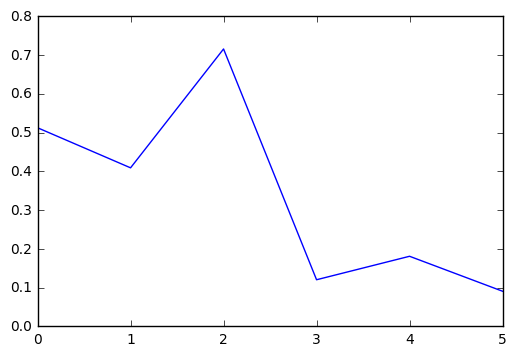

In [7]:
df.A.plot();

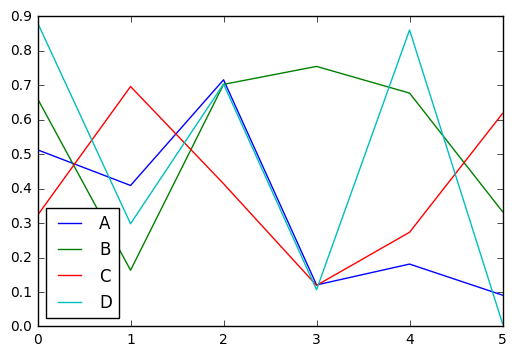

In [8]:
df.plot();

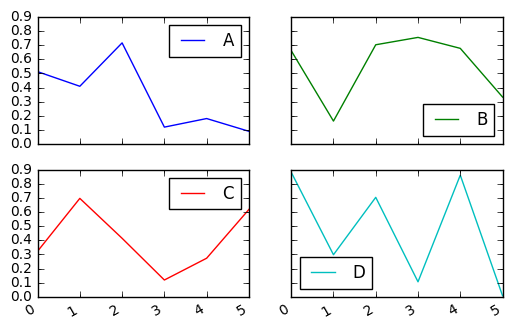

In [9]:
df.plot(subplots=True, layout=(2,2), sharex=True, sharey=True);

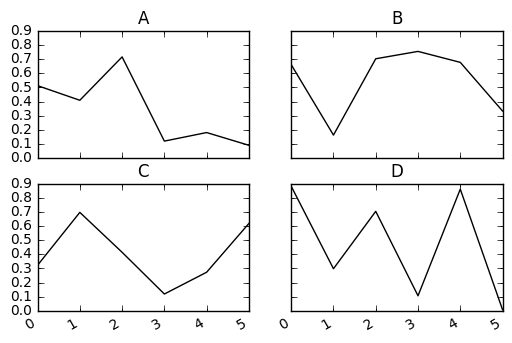

In [10]:
plots = df.plot(subplots=True, layout=(2,2), sharex=True, sharey=True, legend=False, color="black")
for i, plot in enumerate(plots.reshape(4)):
    plot.set(title=df.columns[i])

# Outline
1. Matplotlib basics
2. Plotting from pandas
3. *Different Plot types*
4. Bonus: Interactive online plots
5. Visualizing reviews 

# Bar plots

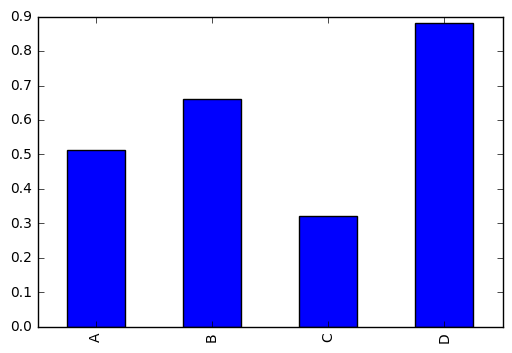

In [11]:
df.ix[0].plot(kind="bar");

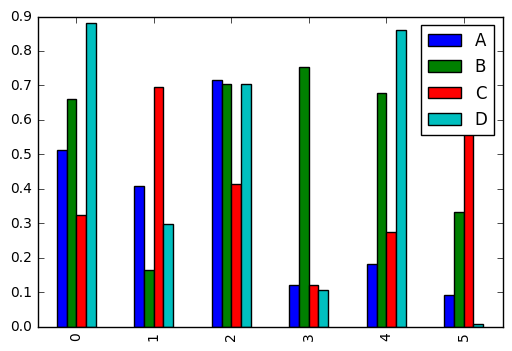

In [12]:
df.plot(kind="bar");

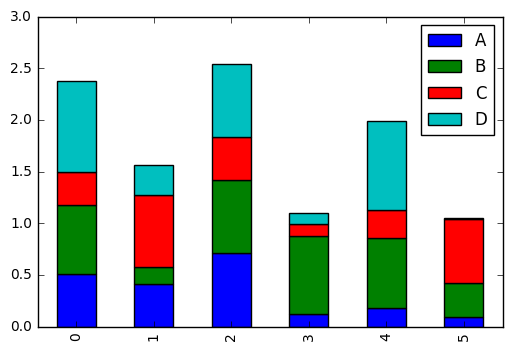

In [13]:
df.plot(kind="bar", stacked=True);

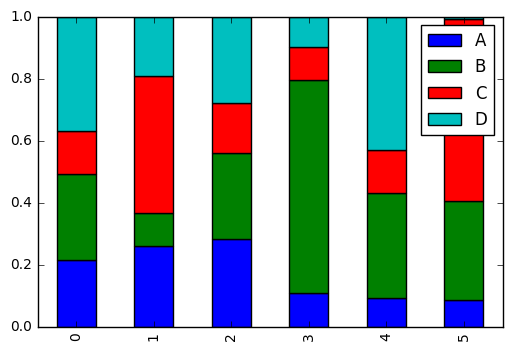

In [14]:
df.div(df.sum(1), axis=0).plot(kind='bar', stacked=True, ylim=[0,1]);

# Histograms and density plots

+ `series.hist()` gives binned histogram
    + Can combine with normal 
+ `series.plot(kind='kde')` gives Kernel Density Estimate 
    + (mixture of gaussians)

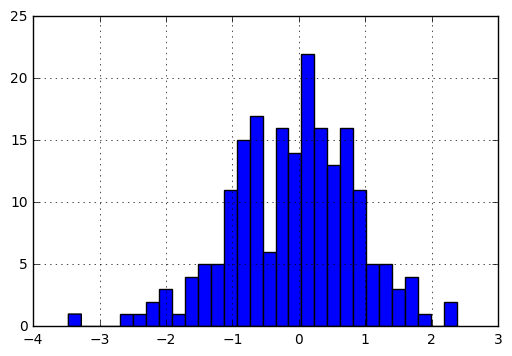

In [15]:
x1 = np.random.normal(0,1, size=200)
pd.Series(x1).hist(bins=30);

# Overlay normal distrubution

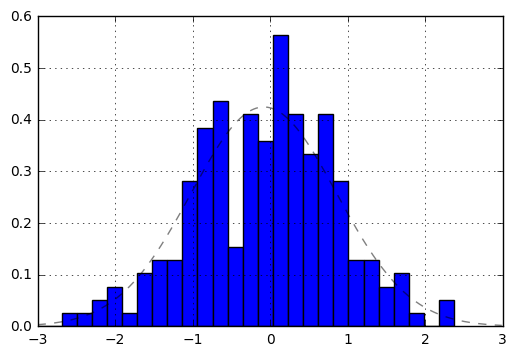

In [16]:
import scipy.stats as stats
f = pd.Series(x1).hist(bins=30, normed=True)
plt.xlim([-3,3])
m = x1.mean()
sd = x1.std()
x = np.arange(-3, 3, 0.01)
y = stats.norm.pdf(x, m, sd)
f.plot(x, y, 'k--', alpha=.5);

# Kernel Density Esimation

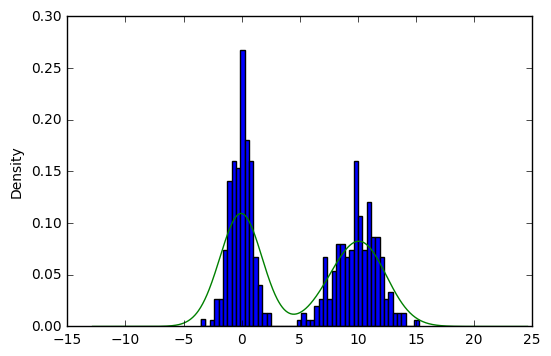

In [17]:
x2 = np.random.normal(10, 2, size=200)
x = pd.Series(np.concatenate([x1, x2]))
x.hist(bins=50, normed=True)
x.plot(kind='kde');

# Scatter plots

+ Plot two aspects of data on x,y
  + E.g. review rating vs. helpfulness
+ Useful for exploring 
  + Raw data (one point per row) 
  + Summary statistics (e.g. average rating vs price)
+ Gives insight into 
  + Overall relation (linear, curve)
  + Outliers
  + Group differences

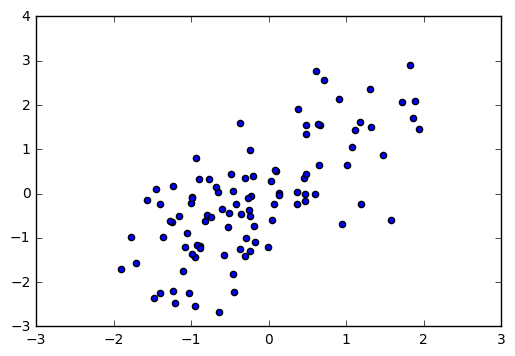

In [18]:
x = np.random.randn(100)
y = x + np.random.randn(100)
plt.scatter(x, y);

## Add regression line

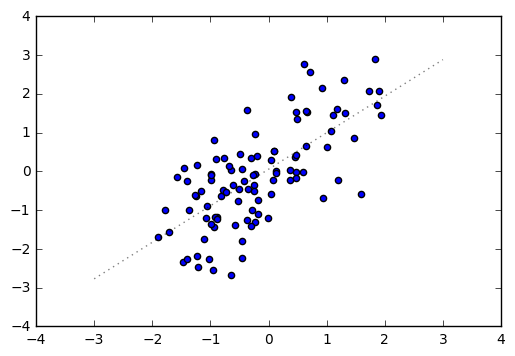

In [19]:
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
x1, x2 = plt.xlim()
y1, y2 = [m*pd.Series(x)+b for x in [x1, x2]]
plt.plot((x1,x2), (y1,y2), 'k:', alpha=.5);

## Color for multiple groups

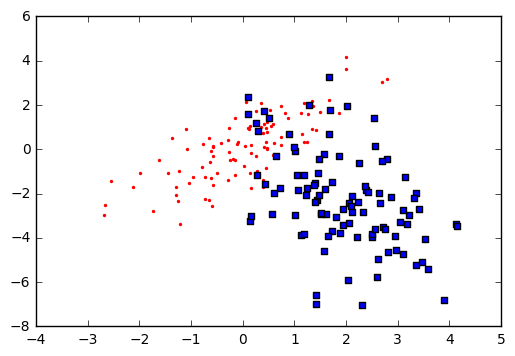

In [20]:
x1 = np.random.randn(100)
y1 = x1 + np.random.randn(100)

x2 = 2 + np.random.randn(100)
y2 = -1 * x2 + 2 * np.random.randn(100)

plt.scatter(x1, y1, color="red", s=2)
plt.scatter(x2, y2, color="blue", edgecolor="black", marker="s");

# Scatter plots from Pandas dataframe

In [21]:
df = pd.DataFrame(np.random.rand(100,3), columns=["Price","Rating", "Sales"])
df['Group'] = np.repeat(["A", "B"], 50)
df['Name'] = np.random.choice(["John", "Sue", "Mary", "Mark"], 100)
df.head()

,Price,Rating,Sales,Group,Name
0,0.021403,0.884257,0.857051,A,John
1,0.910290,0.853595,0.293288,A,Mark
2,0.131893,0.388676,0.606922,A,John
3,0.253455,0.888531,0.887092,A,John
4,0.383711,0.859231,0.083939,A,Sue


# Scatter plots

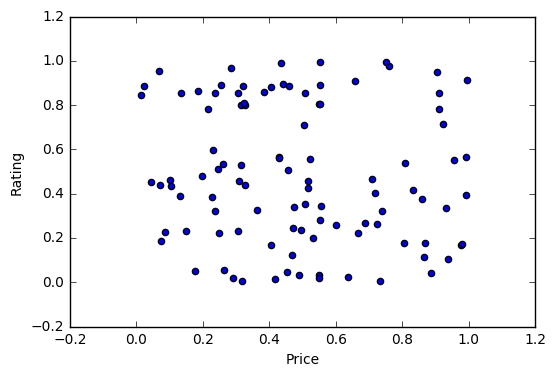

In [22]:
df.plot(kind='scatter', x='Price', y='Rating');

# Multiple groups (single call)

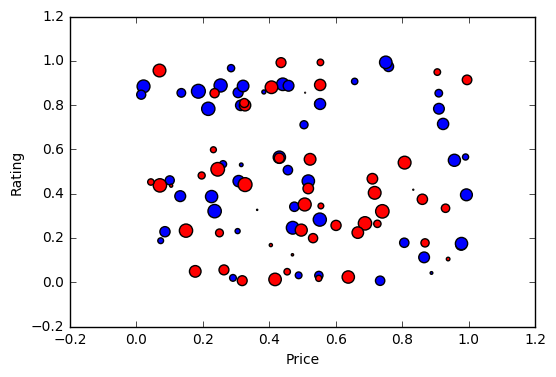

In [23]:
col = df.Group.map({'A': 'blue', 'B': 'red'})
size = df.Sales * 100
df.plot(kind='scatter', x='Price', y='Rating', c=col, s=size);

# Multiple groups (two calls) 
+ Store subfigure result and pass with `ax=subfigure`

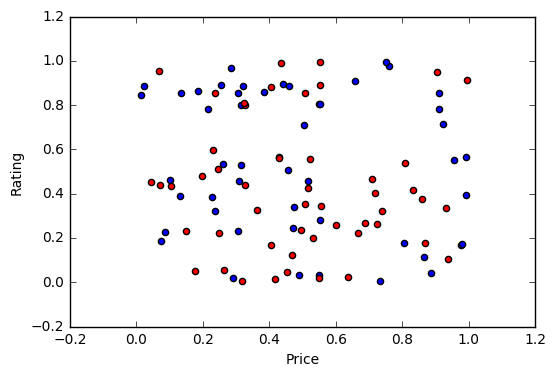

In [24]:
sf = df[df.Group=="A"].plot(kind='scatter', x='Price', y='Rating', c='blue')
df[df.Group=="B"].plot(kind='scatter', x='Price', y='Rating', c='red', ax=sf);

# Scatter matrix

+ Visualize multiple relations at once
+ Use `diagonal='density'` or `'hist'`

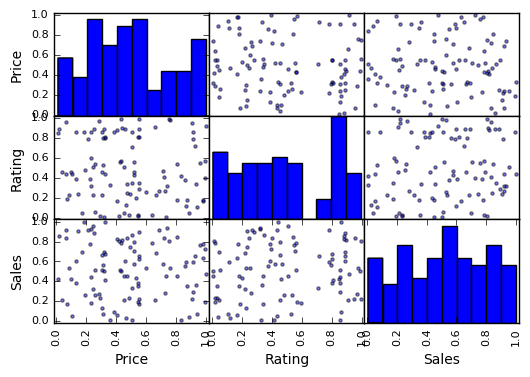

In [25]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, diagonal='hist');

In [26]:
# Error bar plots

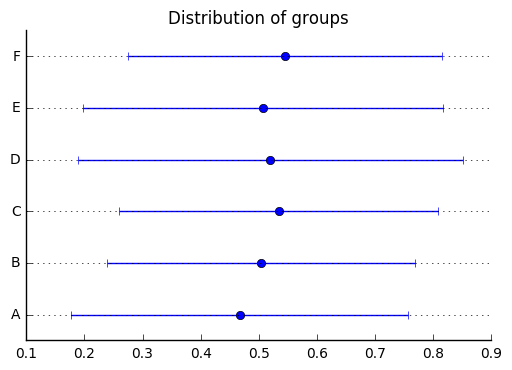

In [27]:
df2 = pd.DataFrame(np.random.rand(30,6), columns=["A","B", "C", "D", "E", "F"])
m = df2.mean()
error = df2.std()
y = range(len(m))
f = plt.subplot()
f.errorbar(x=m, y=y, xerr=error, fmt='o')
f.spines['top'].set_visible(False)
f.spines['right'].set_visible(False)
f.set(yticks=y, yticklabels=m.index)
f.set(ylim=(-0.5, 5.5), title="Distribution of groups")
plt.tick_params(top='off', right='off')
f.yaxis.grid(True)

# Outline
1. Matplotlib basics
2. Plotting from pandas
3. Different Plot types
4. *Bonus: Interactive online plots*
5. Visualizing reviews 

# Interactive plots with plot.ly

+ install plotly and cufflinks
   + `conda install plotly` or `pip install plotly`
+ Create account at http://plot.ly, get api key
+ Create credentials file (once per computer):
   + `plotly.tools.set_credentials_file(username=, api_key=)`
+ Creative interactive charts:
  + From figure: `plotly.plotly.iplot_mpl(fig)`
  + Using cufflinks: `import cufflinks; df.iplot(..)`
  + Using direct plotly commands (see gallery)

In [28]:
import cufflinks as cf
df.iplot(subplots=True, subplot_titles=True)

# Bubble (scatter) plots

In [29]:
fig = plt.figure()
df.iplot(kind='bubble', x='Price', y='Rating', size='Sales', categories='Group', text='Name')

# 3D scatter plots

In [30]:
df.iplot(kind='scatter3d', x='Price', y='Rating', z='Sales', categories='Group', text='Name')

# More resources

+ matplotlib.org/gallery.html
+ http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
+ https://plot.ly/python/ and https://plot.ly/ipython-notebooks/gallery/
+ https://app.dominodatalab.com/nick/notebook-gallery/view/cufflinks.ipynb
+ (plotly from R: https://plot.ly/r/)

# Outline
1. Matplotlib basics
2. Plotting from pandas
3. Different Plot types
4. Bonus: Interactive online plots
5. *Visualizing reviews*

# Exercise: Visualizing reviews

+ Use dataset from amazon or movielens reviews
+ Exploratory data analysis with two or more of:
    + line chart
    + bar chart
    + line+bar chart
    + scatter plot / scatter matrix
+ Advanced usage: at least one of
    + Annotations
    + Other plot types (e.g. from gallery)
    + Interactive chart